Лабораторна робота №4
Студентки групи БС-83
Харченко Софії

In [123]:
import pandas as pd
import numpy as np
import scipy.stats as sts

Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20

In [124]:
data = pd.DataFrame({
    'NormalVar1': np.random.normal(loc=2, scale=5, size=20),
    'NormalVar2': np.random.normal(loc=5, scale=15, size=20),
    'UniformVar': np.random.uniform(size=20),
    'BinomialVar': np.random.binomial(n=25, p=0.9, size=20),
    'GammaVar': np.random.gamma(shape=5, size=20),
    'StandardNormalVar': np.random.standard_normal(size=20)
})
data

,NormalVar1,NormalVar2,UniformVar,BinomialVar,GammaVar,StandardNormalVar
0,9.149979,2.376015,0.461777,23,6.034721,-0.556368
1,7.179237,9.900134,0.463129,21,8.966777,0.950486
2,-8.488975,17.888924,0.141234,24,3.762421,2.435636
3,-3.300221,-5.351663,0.899387,20,4.167981,0.603758
4,-3.880103,11.655371,0.108582,24,3.928378,0.003013
5,4.682898,4.202421,0.620233,20,2.629968,0.717153
6,-0.671632,29.785355,0.053227,22,6.797113,-0.804157
7,-3.839147,-19.205521,0.689867,23,4.572051,-0.313805
8,11.086643,-6.135390,0.947092,21,3.077481,-0.890761
9,7.090974,10.352558,0.718697,21,2.515771,1.636829


Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку: https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf

In [125]:
data = pd.DataFrame({key: sorted(values) for key, values in data.transpose().iterrows()})
data

,NormalVar1,NormalVar2,UniformVar,BinomialVar,GammaVar,StandardNormalVar
0,-8.488975,-19.205521,0.007090,20.0,2.515771,-1.074836
1,-3.880103,-6.135390,0.026249,20.0,2.629968,-0.916548
2,-3.839147,-5.404134,0.053227,21.0,2.841532,-0.890761
3,-3.300221,-5.351663,0.108582,21.0,3.077481,-0.826352
4,-2.829795,2.376015,0.141234,21.0,3.589879,-0.804157
5,-2.820652,2.500038,0.237029,21.0,3.762421,-0.748523
6,-0.671632,3.200567,0.314427,21.0,3.928378,-0.556368
7,-0.024714,4.202421,0.352642,22.0,4.167981,-0.454478
8,1.521546,7.622022,0.461777,22.0,4.572051,-0.313805
9,2.027296,9.900134,0.463129,22.0,4.909333,-0.268348


In [126]:
#sum 1/n(xi)
def FindSum (array,n):
    sum =0
    for i in range(n):
        sum +=array[i]
    return sum/n
sumXi = {i: FindSum(data[i], 20) for i in data}

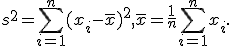

In [127]:
#s^2
def squareS(array, n, x):
    S2 = 0
    for i in range(n):
        S2 += ((array[i] - x)**2)
    return S2
squareS_s2 = {i: squareS(data[i], 20, sumXi[i]) for i in data}

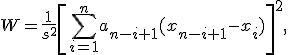

In [128]:
#Коефіціенти "а" беремо з таблиці
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]
WTheory = {i: sts.shapiro(data[i]) for i in data}
#W
def W (array, n, squareS_s2):
    tmp = 0
    for i in range(n//2):
        tmp +=(a[i] * (array[(n-1)-i] - array[i]))
    return tmp**2 /squareS_s2

W = {i: W(data[i], 20, squareS_s2[i]) for i in data}

print("W = ", W)
print("WTheory = ", WTheory)

W =  {'NormalVar1': 0.9797792835988525, 'NormalVar2': 0.9680360528803604, 'UniformVar': 0.9385045418550866, 'BinomialVar': 0.9362437315920399, 'GammaVar': 0.9277665972361628, 'StandardNormalVar': 0.9211226836262612}
WTheory =  {'NormalVar1': (0.9797280430793762, 0.9305411577224731), 'NormalVar2': (0.9678536057472229, 0.7090609073638916), 'UniformVar': (0.9384354948997498, 0.22396059334278107), 'BinomialVar': (0.9363799691200256, 0.20466481149196625), 'GammaVar': (0.9276500940322876, 0.1391342580318451), 'StandardNormalVar': (0.9212072491645813, 0.10453299432992935)}


Згенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [129]:
col = ['Variable', 'Statistics', 'Distribution']
new_data = pd.DataFrame(columns = col)
new_data

,Variable,Statistics,Distribution


Занести в стовпчик Variable назви змінних.

In [130]:
new_data["Variable"] = data.keys()
new_data

,Variable,Statistics,Distribution
0,NormalVar1,NaN,NaN
1,NormalVar2,NaN,NaN
2,UniformVar,NaN,NaN
3,BinomialVar,NaN,NaN
4,GammaVar,NaN,NaN
5,StandardNormalVar,NaN,NaN


Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [131]:
new_data["Distribution"] = [('normal' if 'Normal' in dist else 'non-normal')
                          for dist in new_data["Variable"]]
new_data

,Variable,Statistics,Distribution
0,NormalVar1,NaN,normal
1,NormalVar2,NaN,normal
2,UniformVar,NaN,non-normal
3,BinomialVar,NaN,non-normal
4,GammaVar,NaN,non-normal
5,StandardNormalVar,NaN,normal


Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

In [132]:
for i in range (new_data.shape[0]):
    VARi = new_data["Variable"][i]
    if 'Normal' in VARi:
        new_data["Statistics"][i] = f".{data[VARi].mean()} [ {data[VARi].std()} ]"
new_data

,Variable,Statistics,Distribution
0,NormalVar1,.2.181186327716719 [ 5.679120391375 ],normal
1,NormalVar2,.9.381945658741248 [ 13.15311316411221 ],normal
2,UniformVar,NaN,non-normal
3,BinomialVar,NaN,non-normal
4,GammaVar,NaN,non-normal
5,StandardNormalVar,.0.11492306506551256 [ 0.9758241545804037 ],normal


Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%]

In [133]:
for i in range (new_data.shape[0]):
    not_normal = new_data["Variable"][i]
    if 'Normal'not in not_normal:
        new_data["Statistics"][i] = f".{data[not_normal].median()} \
        [{data[not_normal].quantile(0.25)}; {data[not_normal].quantile(0.75)}]"

new_data

,Variable,Statistics,Distribution
0,NormalVar1,.2.181186327716719 [ 5.679120391375 ],normal
1,NormalVar2,.9.381945658741248 [ 13.15311316411221 ],normal
2,UniformVar,.0.496035655281257 [0.2130801468476978...,non-normal
3,BinomialVar,.22.0 [21.0; 23.25],non-normal
4,GammaVar,.5.006869217202741 [3.7192851662282393...,non-normal
5,StandardNormalVar,.0.11492306506551256 [ 0.9758241545804037 ],normal


Зберегти таблицю в пдф форматі

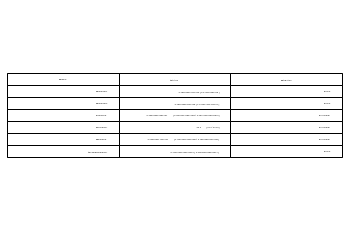

In [135]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(new_data)):
    cell_text.append(new_data.iloc[row])

ax.table(cellText=cell_text, colLabels=new_data.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()